In [1]:
# https://medium.com/@tenzin_ngodup/simple-text-classification-using-random-forest-fe230be1e857

%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

In [4]:
data_df = pd.read_csv('data_exported.csv')

In [18]:
data_df.loc[data_df['Screen Name'] == 'BoredElonMusk', 'who_is_it'] = 0
data_df.loc[data_df['Screen Name'] == 'elonmusk', 'who_is_it'] = 1

data_df['who_is_it'] = data_df['who_is_it'].astype(np.int64)

data_df.tail()

,Screen Name,Tweet Created At,Tweet Text,tweet_cleaned,who_is_it
1995,elonmusk,2019-04-14 23:10:17,@JaneidyEve 6.5,,1
1996,elonmusk,2019-04-14 23:06:20,@Johankyu7 Yes,Yes,1
1997,elonmusk,2019-04-14 23:02:20,Winter is coming,Winter is coming,1
1998,elonmusk,2019-04-14 23:01:59,Thinking about adding giant stainless steel dr...,Thinking about adding giant stainless steel dr...,1
1999,elonmusk,2019-04-14 22:54:51,@EforElectric @WSJ That tweet did take immense...,That tweet did take immense effort Fair poi...,1


In [47]:
data_df['tweet_cleaned'] = data_df['tweet_cleaned'].fillna(' ')

X_text = data_df['tweet_cleaned'].tolist()
y = data_df['who_is_it']
type(X_text)

list

In [48]:
# convert content of string into vector of numbers using TF-IDF
# use pipeline to attach vectorized text data to multinomial bayes classifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

vec = TfidfVectorizer()
X = vec.fit_transform(X_text)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1991)

model = RandomForestClassifier(n_estimators=100, random_state=1991)
model.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1991, verbose=0,
            warm_start=False)

In [49]:
ypred = model.predict(Xtest)

In [50]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       0.78      0.89      0.83       228
          1       0.89      0.79      0.84       272

avg / total       0.84      0.84      0.84       500



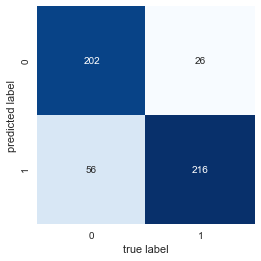

In [52]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label');